# <span style='color:#7C93C3'>Assignment 6</span>
## <span style='color:#7C93C3'> MULTIPLE LINEAR REGRESSION</span>
#### <span style='color:#6A9C89'>OBJECTIVE</span>
    Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

### <span style='color:#6A9C89'>TASKS</span>
#### <span style='color:#6A9C89'>1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR</span>

In [117]:
## Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
import math
warnings.filterwarnings('ignore')
print('Imported')

Imported


In [118]:
## Loading the csv file into DataFrame
df = pd.read_csv('ToyotaCorolla.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


### <span style='color:#47663B'>STATISTICAL REPORT FOR THE DATAFRAME</span>

In [119]:
print(f'The dataframe has {df.shape[0]} rows and {df.shape[1]} columns')

The dataframe has 1436 rows and 11 columns


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


There are total 11 columns <br>
Among which 1 is a categorical feature with datatype Object <br>
and 9 of them are numerical feature with datatype int64

In [121]:
df.select_dtypes(exclude=['object']).describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


##### 1. Number of Data Points (Counts):
    => All numerical varaibles have 1436 entries, indicating no missing values.
##### 2. Central Tendency:
    => The mean (Average) and the median (50th percentile) are close for most variables, suggestinf a fairly symmetric distribution for some variables. However, the difference for variables like KM(mileage) and Price indicates potential skewness.
##### 3. Range:
    => The range (max-min) varies significantly across variables, highlighting the diversity in the dataset.

### <span style='color:#47663B'>EXPLORATORY DATA ANALYSIS</span>

In [122]:
## differentiate numerical and categorical columns
num_cols = df.select_dtypes(include='int64') ## Numerical Columns
cat_cols = df.select_dtypes(exclude='int64') ## Categorical Columns

In [123]:
print(f'Number of Numerical Columns {len(num_cols.columns)}')
print(f'Number of Categorical Columns {len(cat_cols.columns)}')

Number of Numerical Columns 10
Number of Categorical Columns 1


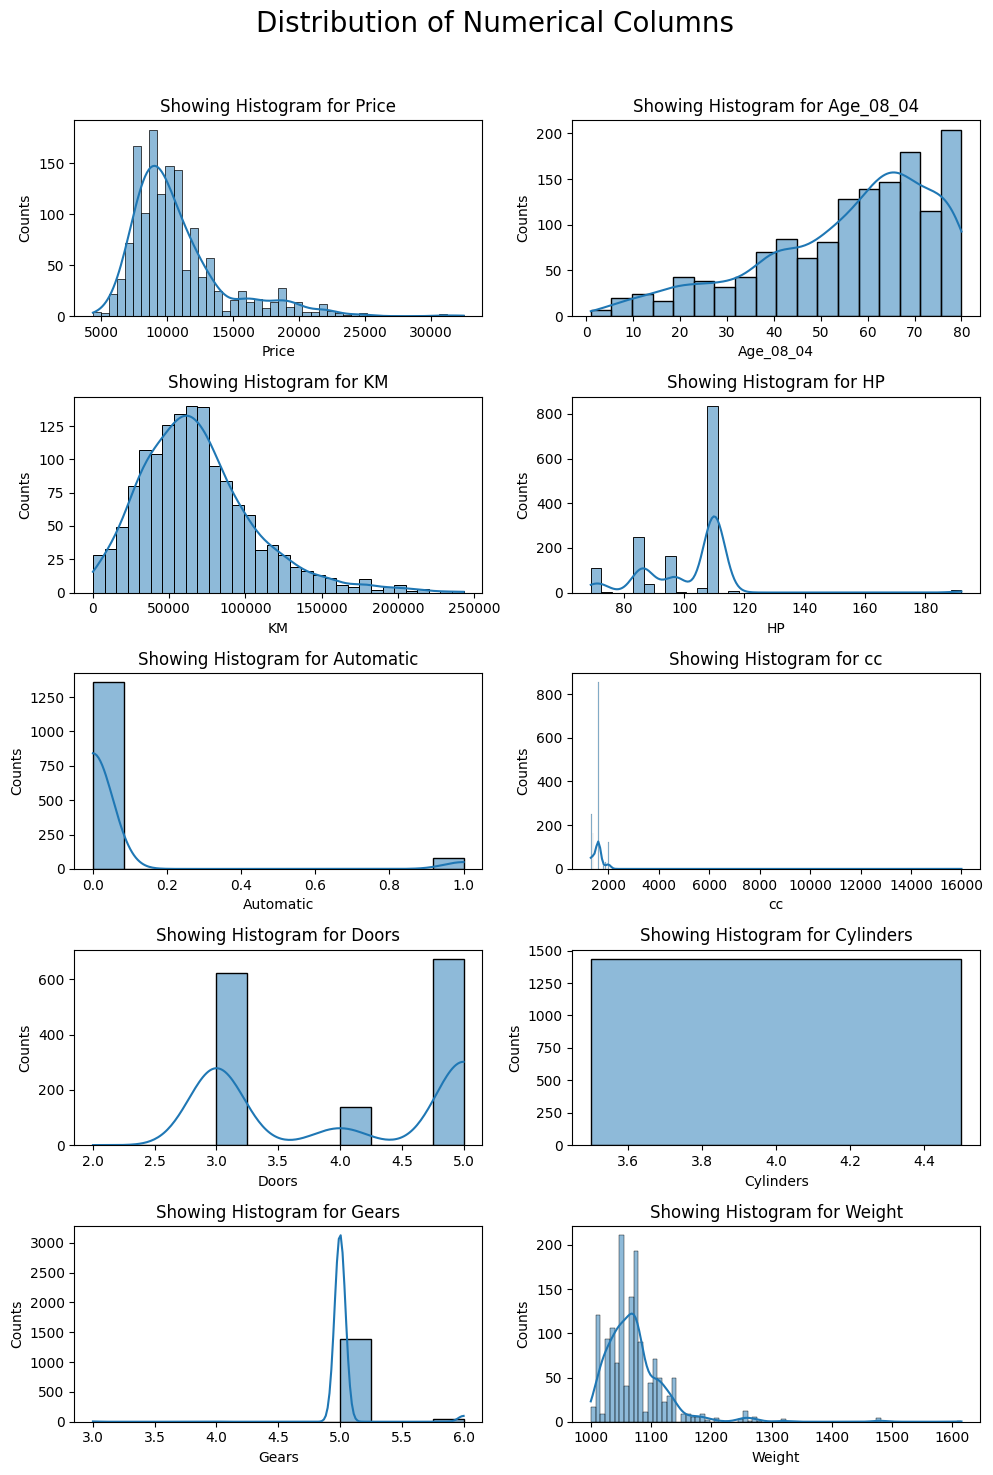

In [124]:
## Let's check the distrubution for the numerical features
## calculate the number of columns
n_cols = num_cols.shape[1]
n_rows = math.ceil(n_cols/2) ## taking to 2 diagrams per row

plt.figure(figsize=(10,n_rows*3))
plt.suptitle('Distribution of Numerical Columns', fontsize=20)

## iterating through the numerial columns
for idx, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, 2, idx)
    sns.histplot(data = num_cols,x=col, kde=True)
    plt.title(f'Showing Histogram for {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Counts')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Analysis for the histplot for numerical columns
##### 1. PERFECT BELL CURVE (GAUSSIAN DISTRIBUTION)
    i.   Price (Right skewed) / Presence of large number outliers in the higher value of the column
    ii.  Kilometers (Slightly Right Skewed) / Presence of outliers in the higher values.
    iii. Weight (Right Skewed) / Presence of large number outliers in higher value of the column.
    iv.  Gears (Left Skewed)

##### 2. IRREGULAR CURVES OR WAVY CURVES
    i.   HP (Prbability of presence of outliers in the smaller values)
    ii.  Automatic (Presence of outliers in after a certain greater values)
    iii. Doors


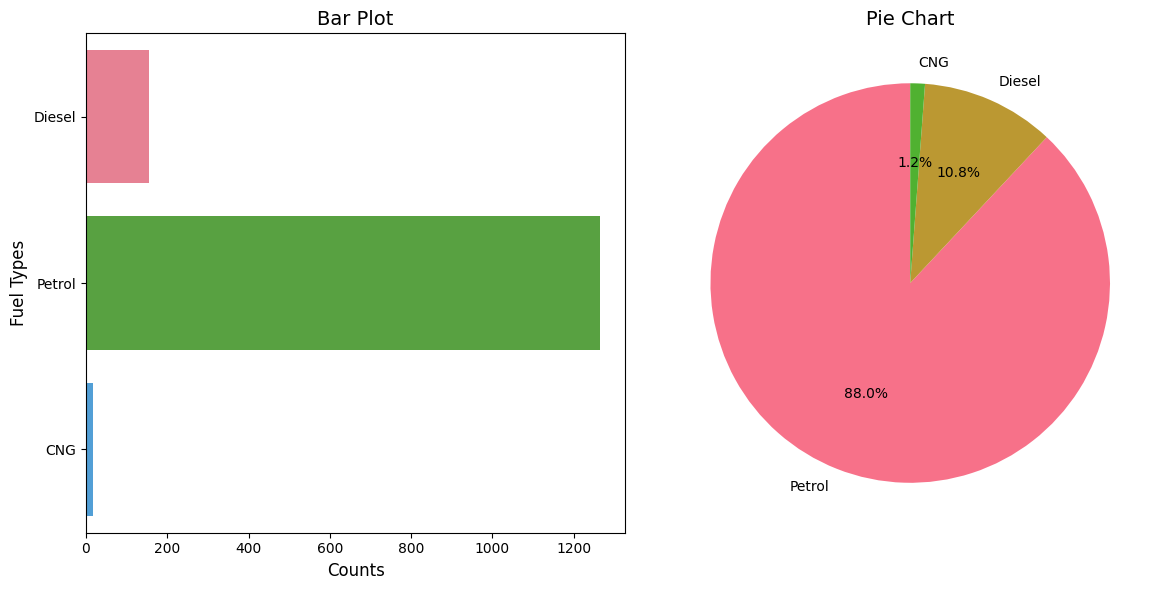

In [125]:
## Let's graph for the visualization of the categorical columns in the dataframe
# Bar Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=cat_cols, y='Fuel_Type', palette='husl')
plt.title('Bar Plot', fontsize=14)
plt.xlabel('Counts', fontsize=12)
plt.ylabel('Fuel Types', fontsize=12)

# Pie Chart
plt.subplot(1, 2, 2)
fuel_counts = cat_cols['Fuel_Type'].value_counts()
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('husl'))
plt.title('Pie Chart', fontsize=14)

plt.tight_layout()
plt.show()


#### Analysis for the Categorical Columns
##### Bar Plot Analysis
    The bar plot visualization reveals that vehicles using petrol dominate, making up the majority of the usage. In contrast, vehicles that run on CNG have minimal representation. The usage of diesel falls approximately at 25% of petrol usage, indicating a significant gap but still substantial compared to CNG.
##### Pie Chart Analysis
    The pie chart provides a percentage-based perspective on the same data:
    1. Petrol: 88% — Dominates vehicle usage, indicating a strong preference.
    2. Diesel: 10.8% — Represents a smaller but notable proportion of usage.
    3. CNG: 1.2% — Least used, making it a negligible portion of the total vehicle count.

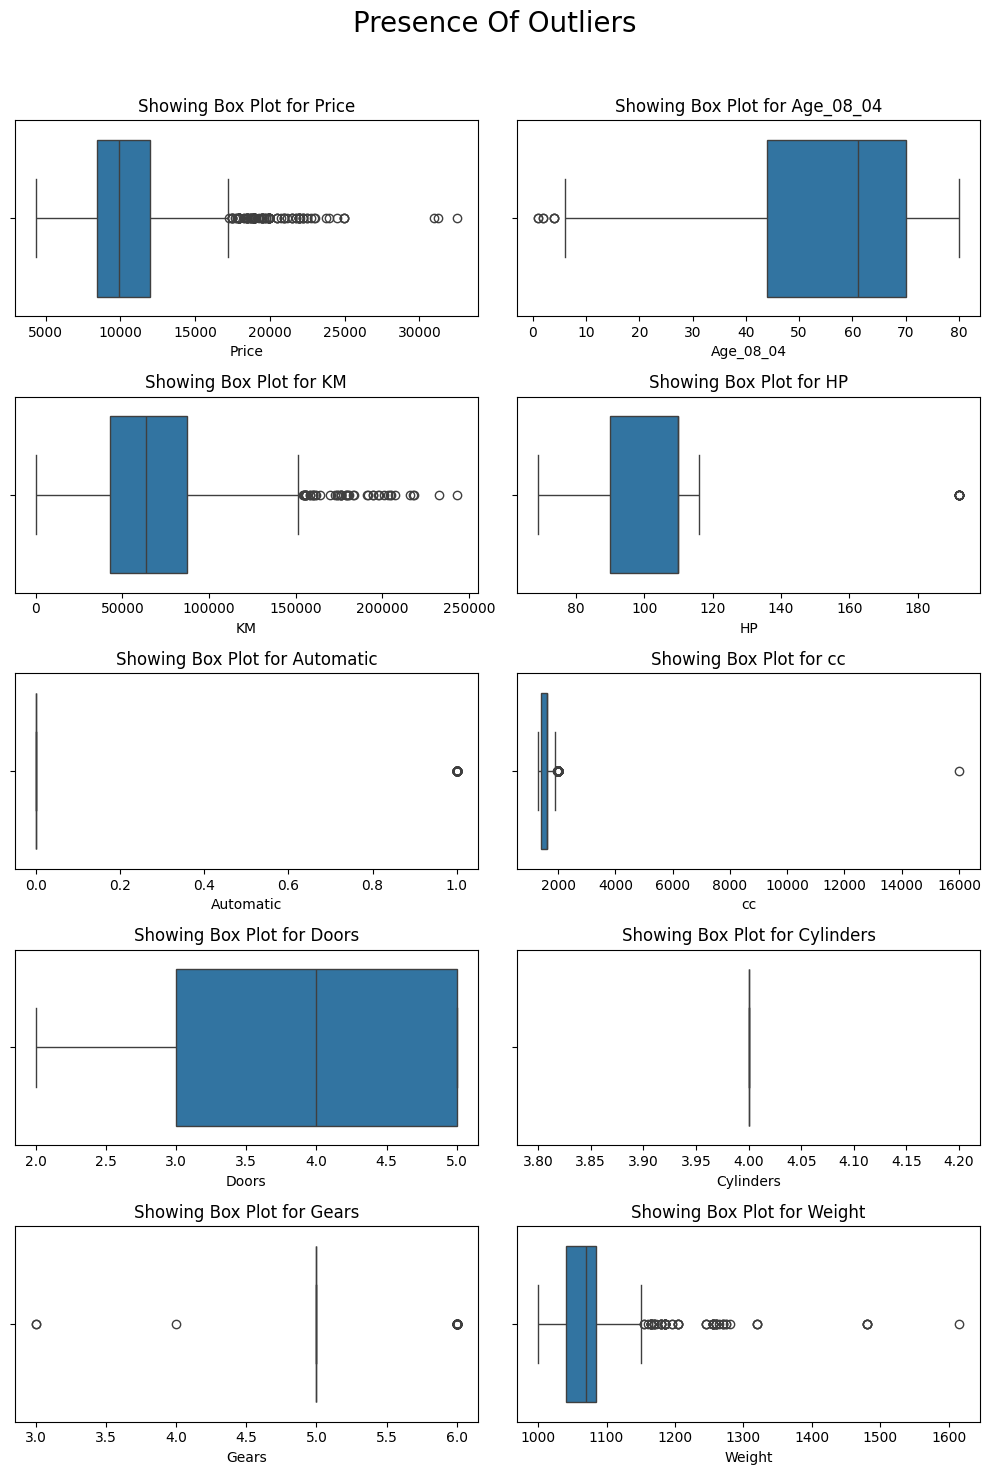

In [126]:
## Let's check the distrubution for the numerical features
## calculate the number of columns
n_cols = num_cols.shape[1]
n_rows = math.ceil(n_cols/2) ## taking to 2 diagrams per row

plt.figure(figsize=(10,n_rows*3))
plt.suptitle('Presence Of Outliers', fontsize=20)

## iterating through the numerial columns
for idx, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, 2, idx)
    sns.boxplot(data = num_cols,x=col)
    plt.title(f'Showing Box Plot for {col}')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### <span style='color:#47663B'>DATA PREPROCESSING</span>

In [127]:
categories = [df.Fuel_Type.unique()]
categories

[array(['Diesel', 'Petrol', 'CNG'], dtype=object)]

In [128]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories=categories, sparse_output=False)
encoded = ohe.fit_transform(df[['Fuel_Type']])
encoded_df = pd.DataFrame(
    encoded,
    columns = ohe.get_feature_names_out(['Fuel_Type']),
    index=df.index
)
df = pd.concat([df,encoded_df], axis=1)

In [129]:
df.drop(columns='Fuel_Type', inplace=True)
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol,Fuel_Type_CNG
0,13500,23,46986,90,0,2000,3,4,5,1165,1.0,0.0,0.0
1,13750,23,72937,90,0,2000,3,4,5,1165,1.0,0.0,0.0
2,13950,24,41711,90,0,2000,3,4,5,1165,1.0,0.0,0.0
3,14950,26,48000,90,0,2000,3,4,5,1165,1.0,0.0,0.0
4,13750,30,38500,90,0,2000,3,4,5,1170,1.0,0.0,0.0


In [130]:
df.Fuel_Type_Diesel.value_counts(),df.Fuel_Type_Petrol.value_counts(),df.Fuel_Type_CNG.value_counts()

(Fuel_Type_Diesel
 0.0    1281
 1.0     155
 Name: count, dtype: int64,
 Fuel_Type_Petrol
 1.0    1264
 0.0     172
 Name: count, dtype: int64,
 Fuel_Type_CNG
 0.0    1419
 1.0      17
 Name: count, dtype: int64)

In [131]:
## removing the outliers
def remove_outliers(data, columns, threshold=1.5):
    for column in columns:
        q1 = data[column].quantile(0.25)  # 25th percentile
        q3 = data[column].quantile(0.75)  # 75th percentile
        iqr = q3 - q1  # Interquartile range
        lower_whisker = q1 - threshold * iqr
        upper_whisker = q3 + threshold * iqr

        # Remove outliers for the current column
        data = data[(data[column] >= lower_whisker) & (data[column] <= upper_whisker)]
    
    return data



In [132]:
df = remove_outliers(df, df.columns, threshold=1.5)
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol,Fuel_Type_CNG
18,16750,24,25563,110,0,1600,3,4,5,1065,0.0,1.0,0.0
19,16950,30,64359,110,0,1600,3,4,5,1105,0.0,1.0,0.0
20,15950,30,67660,110,0,1600,3,4,5,1105,0.0,1.0,0.0
22,15950,28,56349,110,0,1600,3,4,5,1120,0.0,1.0,0.0
23,16950,28,32220,110,0,1600,3,4,5,1120,0.0,1.0,0.0


In [133]:
print(f'After removing the outliers the shape of the data remains {df.shape}')

After removing the outliers the shape of the data remains (1053, 13)


### <span style='color:#47663B'>SPLITTING DATA INTO INDEPENDENT AND DEPENDENT VARIABLES FOR MODEL</span>

In [134]:
## let's split the data into independent and dependent variables
x = df.drop(columns='Price', axis=0) ## independent variables
y = df['Price'] ## dependent variables

#### <span style='color:#6A9C89'>2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).</span>

In [135]:
## importing train-test-splitt for splittng the data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42) ## test data size = 20% and train data size = 80%

### <span style='color:#47663B'>STANDARDIZING THE DATA</span>

In [136]:
## importing standardscaler for standardizing the model for better prediction
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() ## initializing StandardScaler
x_train = scaler.fit_transform(x_train) ## fit_transform-ing x_train
x_test = scaler.transform(x_test) ## transforminging x_test

#### <span style='color:#6A9C89'>3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.</span>

## <span style='color:#6A9C89'>Multiple Linear Regression</span>

In [137]:
## importing Linear-Model
from sklearn.linear_model import LinearRegression
## initializing Linear Regression
regression = LinearRegression() 

In [138]:
## training the model based on x_training and y_training data
regression.fit(x_train, y_train)

LinearRegression()

In [139]:
print(f'The Coefficient of the X variables are \n\n {regression.coef_}')
print(f'\nThe Intercept of the model is {regression.intercept_}')

The Coefficient of the X variables are 

 [-1.66937599e+03 -3.33767485e+02 -8.92823973e+02 -6.92779167e-14
  8.11751793e+02 -4.89251699e+01  0.00000000e+00  0.00000000e+00
  5.92887212e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00]

The Intercept of the model is 9972.270783847986


In [140]:
## Prediction using the model and the test data
y_pred_mlr = regression.predict(x_test)

#### <span style='color:#6A9C89'>4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.</span>

In [141]:
## importing necessary libraries to evaluate the score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = np.round(mean_absolute_error(y_pred_mlr, y_test),2)
mse = np.round(mean_squared_error(y_pred_mlr, y_test), 2)
r2 = np.round(r2_score(y_pred_mlr,y_test), 2)
print(f'Mean Absolute Error {mae}')
print(f'Mean Squared Error {mse}')
print(f'R Square Score {r2}')

Mean Absolute Error 757.48
Mean Squared Error 937815.88
R Square Score 0.79


#### <span style='color:#6A9C89'>5.Apply Lasso and Ridge methods on the model.</span>

## <span style='color:#6A9C89'>Lasso Regression</span>

In [143]:
## importing Lasso and Ridge Regression
from sklearn.linear_model import Lasso, Ridge
## for Lasso
lasso = Lasso()

In [153]:
## Hyper-Parameter Tunning
params = {
    'alpha' : [0.5, 0.7, 0.8, 1.0],
    'max_iter' : [100, 200, 300, 500, 700, 800, 1000],
    'selection' : ['cyclic', 'random']
}

In [154]:
## importing stratified k fold cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

In [155]:
## importing Grid Search CV
from sklearn.model_selection import GridSearchCV
grid_lasso = GridSearchCV(estimator=lasso, param_grid=params, scoring='accuracy',cv=skf)

In [156]:
## fitting the model for training data
grid_lasso.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.5, 0.7, 0.8, 1.0],
                         'max_iter': [100, 200, 300, 500, 700, 800, 1000],
                         'selection': ['cyclic', 'random']},
             scoring='accuracy')

In [161]:
## seeing best lasso params
grid_lasso.best_params_

{'alpha': 0.5, 'max_iter': 100, 'selection': 'cyclic'}

In [166]:
## making a new lasso regression model with best estimators
best_lasso = grid_lasso.best_estimator_
best_lasso

Lasso(alpha=0.5, max_iter=100)

In [167]:
print(f'The co-efficient with Lasso Regression are \n\n{best_lasso.coef_}')

The co-efficient with Lasso Regression are 

[-1650.65766894  -331.06769045  -472.92823644     0.
   398.40034868   -41.34425807     0.             0.
   581.80357625     0.             0.             0.        ]


In [168]:
## predicting the values with lasso best params
y_pred_lasso = best_lasso.predict(x_test)

In [184]:
## evaluation metrics
mae = np.round(mean_absolute_error(y_pred_lasso, y_test),2)
mse = np.round(mean_squared_error(y_pred_lasso, y_test), 2)
r2 = np.round(r2_score(y_pred_lasso,y_test), 2)
print(f'Mean Absolute Error {mae}')
print(f'Mean Squared Error {mse}')
print(f'R Square Score {r2}')

Mean Absolute Error 763.08
Mean Squared Error 943064.51
R Square Score 0.79


## <span style='color:#6A9C89'>Ridge Regression</span>

In [170]:
## for Ridge Regression
ridge = Ridge()

In [175]:
## hyper-parameter tunning
ridge_params={
    'alpha' : [0.5, 0.7, 0.8, 1.0, None],
    'max_iter' : [100, 200, 300, 500, 700, 800, 1000, None],
    'solver' : ['auto','lbfgs', 'saga','cholesky']
}

In [176]:
## importing Grid Search CV
from sklearn.model_selection import GridSearchCV
grid_ridge = GridSearchCV(estimator=ridge, param_grid=ridge_params, scoring='accuracy',cv=skf)

In [177]:
grid_ridge.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.5, 0.7, 0.8, 1.0, None],
                         'max_iter': [100, 200, 300, 500, 700, 800, 1000, None],
                         'solver': ['auto', 'lbfgs', 'saga', 'cholesky']},
             scoring='accuracy')

In [179]:
print(f'The best parameters for the Ridge Regression is\n {grid_ridge.best_params_}')

The best parameters for the Ridge Regression is
 {'alpha': 0.5, 'max_iter': 100, 'solver': 'auto'}


In [180]:
## creating a new model using best ridge estimator
best_ridge = grid_ridge.best_estimator_
best_ridge

Ridge(alpha=0.5, max_iter=100)

In [182]:
## co-efficient of ridge regression
print(f'The Co-efficient of the Ridge Regression are \n {best_ridge.coef_}')

The Co-efficient of the Ridge Regression are 
 [-1663.20865752  -333.56578354  -782.76242331     0.
   702.89082837   -47.15618761     0.             0.
   590.53880938     0.             0.             0.        ]


In [183]:
## predicting the test data using best rige estimator
y_pred_ridge = best_ridge.predict(x_test)

In [185]:
## evaluation metrics
mae = np.round(mean_absolute_error(y_pred_ridge, y_test),2)
mse = np.round(mean_squared_error(y_pred_ridge, y_test), 2)
r2 = np.round(r2_score(y_pred_ridge,y_test), 2)
print(f'Mean Absolute Error {mae}')
print(f'Mean Squared Error {mse}')
print(f'R Square Score {r2}')

Mean Absolute Error 758.91
Mean Squared Error 938930.45
R Square Score 0.79


## <span style='color:#7C93C3'>INTERVIEW QUESTIONS</span>
#### <span style='color:#6A9C89'>1.What is Normalization & Standardization and how is it helpful?</span>
##### STANDARDIZATION
    Standardization is used for scalling the data, particularly in the context of machine learning, data analysis and static modelling. They are often used to ensure that fearures have comparable scales, that prevents any one feature from dominating the model simply because of its larger magnitude.
    When Standardization is used
    1. Machine Learning Algorithms
            Support Vector Machine (SVM) <br>
            K-Nearest Neighbors (K-NN) <br>
            Principal Component Analysis <br>
            Logistic Regression and Linear Regression <br>
    2. Gradient Based Algorithms
    3. Assumption of Normality
##### NORMALIZATION
    Normalization is used to scale data, particularly in contexts where features have varying ranges, by transforming them into a specific range, typically [0, 1]. This helps improve model performance, especially for distance-based algorithms.
    When Normalization is used:
    1. Machine Learning Algorithms:
    2. K-Nearest Neighbors (K-NN)
    3. Neural Networks
    4. Naive Bayes
    5. Distance-Based Algorithms: (e.g., Euclidean distance)
    6. Assumption of Uniform Distribution or Bounded Features
    

#### <span style='color:#6A9C89'>2.What techniques can be used to address multicollinearity in multiple linear regression?</span>
##### To address multicollinearity in multiple linear regression, you can use the following techniques:
    Remove Highly Correlated Features: Identify and remove one of the correlated features.
    Principal Component Analysis (PCA): Reduce the dimensionality of the dataset.
    Ridge Regression: Apply regularization to penalize large coefficients.
    Lasso Regression: Use L1 regularization to shrink some coefficients to zero.
    Variance Inflation Factor (VIF): Remove features with high VIF values.